# Board Representation Visualisations for the Report

This notebook creates the visualisations of the axial coordinate representation of the board and how the board is stored represented in using an array/tensor.

## Install Dependencies

The following dependencies are required to run this notebook.

In [1]:
%%bash

# pip install numpy
# pip install matplotlib

## Imports

In [2]:
import sys
sys.path.append('../blooms')

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch, Rectangle, RegularPolygon
from matplotlib import ticker

from BloomsLogic import Board

## Add Function to Visualise the Axial Coordinate System

In [3]:
def visualise_coord_system(self, show_coords=False, title=""):
    """Visualise the axial coordinate system used for the board using matplotlib.

    :param show_coords: whether or not to annotate each space with its axial
        coordinates.
        :param show_coords: whether or not to annotate each space with its axial
        coordinates.
    """

    fig, ax = plt.subplots(1, figsize=(5, 5))
    ax.set_aspect('equal')

    for q in range(0, self.board_2d.shape[-1]):
        for r in range(0, self.board_2d.shape[-1]):
            if self.is_valid_space((q, r)):
                x, y = self.axial_to_pixel(q, r)
                colour = self.board_2d[r, q]
                face_colour = f'C{int(colour)}' if colour else 'w'
                hexagon = RegularPolygon((x, y),
                                         numVertices=6,
                                         radius=1.75 * np.sqrt(1 / 3),
                                         alpha=0.2,
                                         edgecolor='k',
                                         facecolor=face_colour)
                ax.add_patch(hexagon)

                if show_coords:
                    ax.annotate(text=f'{q}',
                                xy=(x - 0.3, y + 0.3),
                                color='C0',
                                ha='center',
                                va='center')
                    
                    ax.annotate(text=f'{r}',
                                color='C1',
                                xy=(x + 0.3, y - 0.3),
                                ha='center',
                                va='center')

    legend_elements = [Patch(facecolor='C0', edgecolor='w', alpha=0.2, label='q'),
                       Patch(facecolor='C1', edgecolor='w', alpha=0.2, label='r')]

    plt.title(title)
    
    plt.xticks([])
    plt.yticks([])

    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    
    ax.legend(handles=legend_elements, ncol=1, loc='lower right')
    plt.gca().invert_yaxis()
    plt.autoscale(enable=True)
    plt.savefig('outputs/board_coord_system_visualisation.pdf')
    plt.show()
    
Board.visualise_coord_system = visualise_coord_system

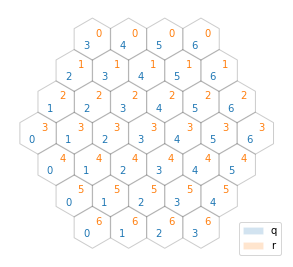

In [4]:
board = Board()
board.visualise_coord_system(show_coords=True)

## Add Function to Visualise how the Board is Stored in an Array

In [5]:
def visualise_array(self, show_coords=False, title=""):
    """Visualise how the board is stored in an array/tensor using matplotlib.

    :param show_coords: whether or not to annotate each space with its axial
        coordinates.
        :param show_coords: whether or not to annotate each space with its axial
        coordinates.
    """

    fig, ax = plt.subplots(1,  figsize=(5, 5))
    ax.set_aspect('equal')

    for x in range(0, self.board_2d.shape[-1]):
        for y in range(0, self.board_2d.shape[-1]):
            face_colour = 'w' if self.is_valid_space((x, y)) else 'C5'
            rectangle = Rectangle((x - 0.5, y - 0.5),
                                  width=1,
                                  height=1,
                                  alpha=0.2,
                                  edgecolor='k',
                                  facecolor=face_colour)
            ax.add_patch(rectangle)
        
            if self.is_valid_space((x, y)):
                ax.annotate(text=f'({x}, {y})',
                            xy=(x, y),
                            ha='center',
                            va='center')

    plt.title(title)
    
    plt.xticks(range(0, self.board_2d.shape[-1]))
    ax.xaxis.set_label_position('top') 
    ax.xaxis.set_ticks_position('none') 
    ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('q = %d'))
    
    plt.yticks(range(0, self.board_2d.shape[-1]))
    ax.yaxis.set_ticks_position('none')
    ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('r = %d'))
    
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.spines["bottom"].set_visible(False)

    plt.gca().invert_yaxis()
    plt.autoscale(enable=True)
    plt.savefig('outputs/board_array_visualisation.pdf')
    plt.show()
    
Board.visualise_array = visualise_array

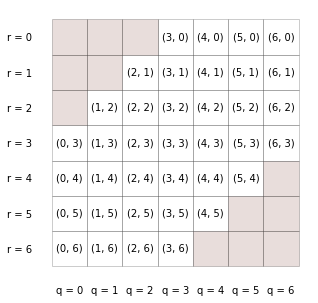

In [6]:
board = Board()
board.visualise_array()